# DETECCIÓN DE LENGUAJE EN TEXTO USANDO UN CLASIFICADOR BAYESIANO INGENUO 

Este notebook tiene cómo objetivo, realizar la implementación de un modelo de predicción de idioma, por medio de un clasificador bayesiano ingenuo.

## Requisitos
Para ejecutar correctamente esta demo, se requiere:
- Python 3.0 con Jupyter

Imports de paquetes necesarios

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime

Se realiza la lectura del conjunto de datos para entrenamiento y pruebas.

Posteriormente se obtienen las variables dependiente e independiente.

Luego se convirten las etiquetas a valores númericos.

In [ ]:
warnings.simplefilter("ignore")
# read the dataset and create dataframe
data = pd.read_csv('D:\TFM\dataset_multilanguage_train_test.csv')

# separating the independent and dependant features
X = data["Text"]
y = data["Language"]
# converting categorical variables to numerical

le = LabelEncoder()
y = le.fit_transform(y)


Se utiliza la función CountVectorizer para tokenerizar 

In [ ]:
# creating bag of words using countvectorizer
cv = CountVectorizer(analyzer='char',lowercase=True, ngram_range=(2,2))
X = cv.fit_transform(X).toarray()

Se definen los conjuntos de test y de entrenamiento

In [ ]:
#train test splitting
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.10)

se define el modelo y se ajusta el modelo utilizando el conjunto de datos de entrenamiento.

In [ ]:
#model creation and prediction
model = MultinomialNB()
model.fit(x_train, y_train)

se realiza la predicción usando el conjunto de datos de prueba y se evalua el modelo.

In [12]:
# prediction 
y_pred = model.predict(x_test)
# model evaluation
ac = accuracy_score(y_test, y_pred)
print('Accuracy = ', ac)

Accuracy =  0.96


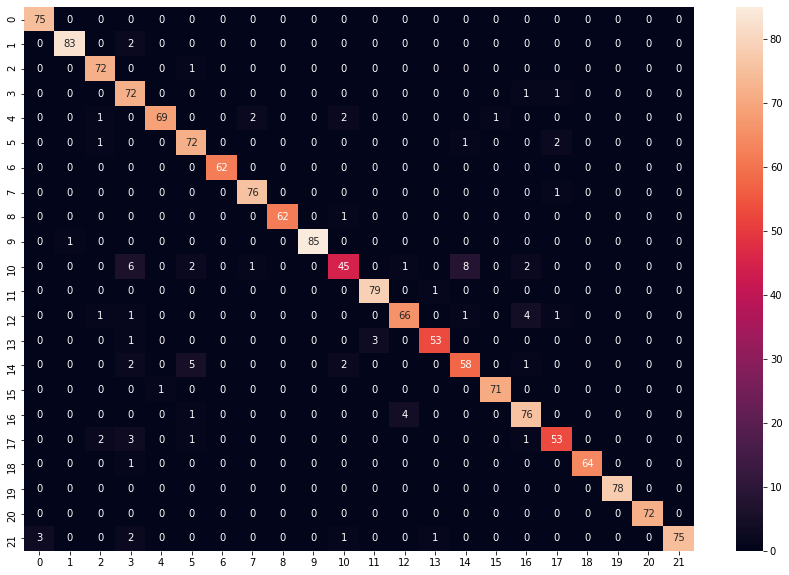

In [53]:
cm = confusion_matrix(y_test, y_pred)
# visualising the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()
# function for predicting language

se crea la función que va a poder ser usada para determinar el dicioma con el modelo ya preentrenado

In [3]:
def predict(text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    return lang[0]


ya con el modelo entrenado se pdocede a realizar la deteccion de idioma con le mismo conunto de datos usado con las demás herramientas de la prueba:

In [4]:
## Se lee el dataset y se genera un nuevo archivo con una columna andicional, con el resultado de la deteccion
## realizada por elastic search language detection.
import csv
from csv import reader
from datetime import datetime

i = 1
print(datetime.now().strftime("%d/%m/%Y %H:%M:%S"))
##Archivo para almacenar resultados
outputFile = open('D:\TFM\dataset_multilanguage_bayesian_result.csv', 'w', encoding="utf8",newline='')
writer = csv.writer(outputFile)
writer.writerow(['Text', 'Language', 'LanguageDetected'])

# leer dataset
with open('D:\TFM\dataset_multilanguage.csv', 'r', encoding="utf8") as read_obj:
    csv_dict_reader = csv.DictReader(read_obj)
    for row in csv_dict_reader:
        if i > 5000:  ## usar los mismo 5000 textos usados con azure cognitive services
            break
        try: 
            #print('Detectando texto ', i, '....')
            writer.writerow([row['Text'], row['language'], predict(row['Text'])])
        except Exception as err:
            ## si falla algo abortar
            print("Encountered exception. {}".format(err))
            break
        i = i +1
outputFile.close()
print('Finalizó proceso') 
print(datetime.now().strftime("%d/%m/%Y %H:%M:%S"))

21/05/2022 13:24:37
Finalizó proceso
21/05/2022 13:24:48


In [5]:
import pandas as pd
import numpy as np
results  = pd.read_csv('D:\TFM\dataset_multilanguage_bayesian_result.csv')
results['Compare'] = np.select([results ['Language'] != results ['LanguageDetected']], ['Different'], 'Same ')
results = results.drop(['Text'], axis=1)
countT = results.groupby(['Language','Compare']).size().reset_index(name="count")
results = results[results.Compare == 'Different']
print(results)
results.head(15)

       Language LanguageDetected    Compare
1       Swedish          English  Different
18    Portugese          English  Different
42        Latin          English  Different
66         Thai          English  Different
83       Korean          English  Different
...         ...              ...        ...
4761       Urdu          English  Different
4769   Estonian          English  Different
4821    Turkish          English  Different
4840    Chinese          English  Different
4922   Romanian          English  Different

[134 rows x 3 columns]


,Language,LanguageDetected,Compare
1,Swedish,English,Different
18,Portugese,English,Different
42,Latin,English,Different
66,Thai,English,Different
83,Korean,English,Different
114,Romanian,Indonesian,Different
166,Indonesian,English,Different
246,Japanese,English,Different
253,Latin,English,Different
283,Turkish,English,Different


In [13]:
#count = results.groupby(['Language']).size().reset_index(name="count")
#count = count.sort_values('count',ascending=True)
#countT['countT'] = countT['count'].groupby(countT['Language']).transform('sum')
#countT = countT[countT.Compare == 'Different']
#countT = countT.sort_values('count',ascending=True)

#Formatear el dataframe en formato html
#from IPython.core.display import HTML
#HTML(countT.to_html(classes='table table-stripped'))


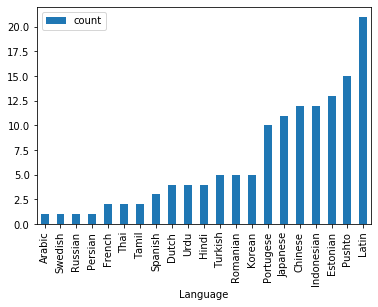

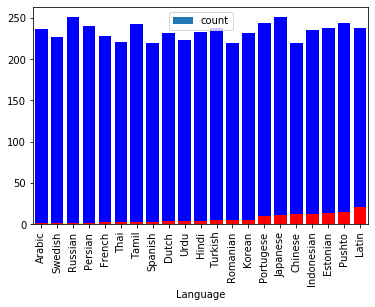

In [7]:
import matplotlib.pyplot as plt
axT = countT.plot.bar(x='Language', y='count', rot=90)
ax = count.plot.bar(x='Language', y='count', rot=90)

plt.bar(countT['Language'], countT['count'], color='r')
plt.bar(countT['Language'],countT['countT'], bottom=countT['count'], color='b')
plt.xticks(rotation=90)
plt.show()

              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       236
     Chinese       0.98      0.94      0.96       207
       Dutch       0.98      0.98      0.98       228
     English       0.67      1.00      0.80       223
    Estonian       1.00      0.94      0.97       225
      French       0.98      0.99      0.98       226
       Hindi       1.00      0.98      0.99       229
  Indonesian       1.00      0.95      0.97       223
    Japanese       1.00      0.95      0.97       240
      Korean       1.00      0.98      0.99       226
       Latin       0.99      0.90      0.95       217
     Persian       1.00      1.00      1.00       239
   Portugese       1.00      0.96      0.98       234
      Pushto       1.00      0.93      0.97       229
    Romanian       1.00      0.98      0.99       214
     Russian       0.99      1.00      0.99       250
     Spanish       0.99      0.99      0.99       217
     Swedish       1.00    

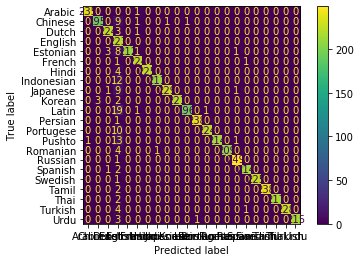

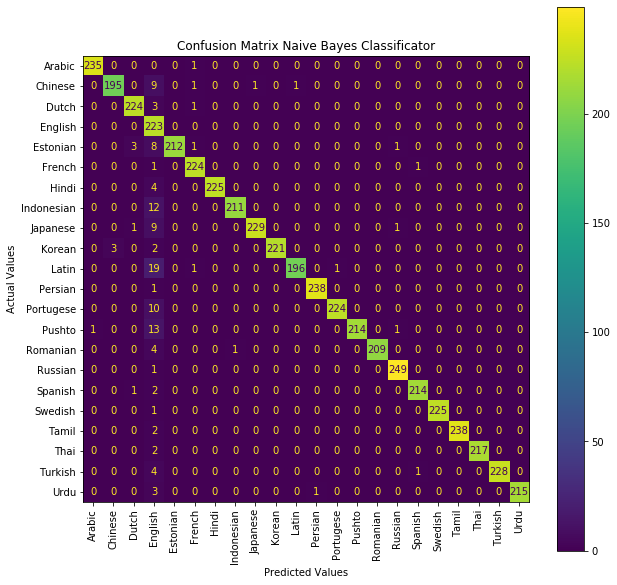

In [8]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

results2  = pd.read_csv('D:\TFM\dataset_multilanguage_bayesian_result.csv')
labels = ['Arabic', 'Chinese', 'Dutch', 'English', 'Estonian', 'French', 'Hindi', 'Indonesian', 'Japanese', 'Korean', 'Latin', 'Persian', 'Portugese', 'Pushto', 'Romanian', 'Russian', 'Spanish', 'Swedish', 'Tamil', 'Thai', 'Turkish', 'Urdu']

cmd = ConfusionMatrixDisplay.from_predictions(results2['Language'], results2['LanguageDetected'])
fig, ax = plt.subplots(figsize=(10,10))
cmd.plot(ax=ax)
cmd.ax_.set(
                title='Confusion Matrix Naive Bayes Classificator', 
                xlabel='Predicted Values', 
                ylabel='Actual Values')

plt.xticks(rotation=90)




print(classification_report(results2['Language'], results2['LanguageDetected']))

In [9]:
print(accuracy_score(results2['Language'], results2['LanguageDetected']))

0.9732
